## Lecture 9 Simulations and Examples of Correlation 

In [30]:
#load needed modules 
import numpy as np
from numpy import linalg
from hdf5storage import loadmat
from matplotlib import pyplot as plt

In [31]:
def sinusoid(f,t,A = 1,theta = 0):
    ''' makes a sinusoid of given frequency (f) at the time points given in t. 
    Amplitude (A) and phase (theta) can be optionally specified.  Phase is given in degrees not radians'''
    theta = theta*np.pi/180 #convert theta from degrees to radians
    e = A*np.cos(2*np.pi*f*t+theta)
    return e

### Simulation 1 Eigenvalues and Eigenvectors of a Square Symmetric matrix 

In [32]:
A = np.array([[2 ,-1],[-1,3]])  
d,v = linalg.eig(A) #calculate eigenvalues(d) and eigenvectors(v)
z = np.transpose(v)@A@v #show that transformed matrix is diagonal 

#### Lets do some examining of numbers and sanity check

In [33]:
print('A')
print(A)

A
[[ 2 -1]
 [-1  3]]


In [34]:
print('z')
print(z)

z
[[ 1.38196601e+00 -1.11022302e-16]
 [-2.22044605e-16  3.61803399e+00]]


#### Examing the eigenvalues and eigenvectors 

In [35]:
print('Eigenvalues are in d')
print(d)
print('Eigenvectors are in in v')
print(v)

Eigenvalues are in d
[1.38196601 3.61803399]
Eigenvectors are in in v
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


In [36]:
unit= linalg.norm(v[:,0])
x = np.sqrt(v[:,0]**2+v[:,1]**2)

#### Example EEG data 

In [42]:
eeg = loadmat('data/eeg.mat') #Load 2 channels of EEG
occ = eeg['Occ'][0]
occ = occ - np.mean(occ) #I need to center the data and remove the mean. 
fro = eeg['Fro'][0]
fro = fro -np.mean(fro) #I need to follow my own rule and remove the mean.
nsamp = len(fro)
time = np.arange(0,nsamp,1)
data = np.array([occ,fro]) #put them together in a matrix
Cdata = np.cov(data,bias = True) #compute covariance - note that this computation divides by n-1 as it is "unbiased" 
Cmult = (1/(nsamp))*(data@np.transpose(data)) #compute covariance by matrix multiplication
Rdata = np.corrcoef(data)

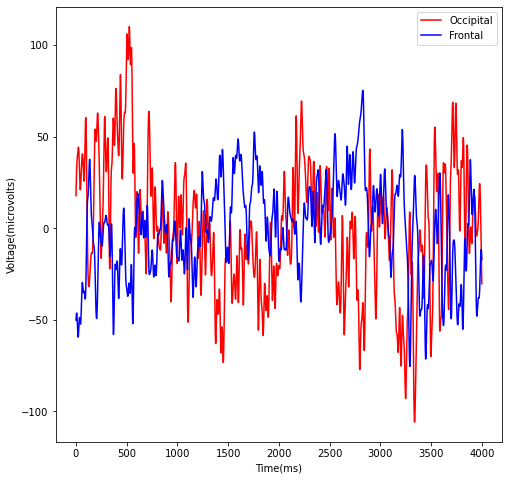

In [43]:
plt.figure(figsize = (8,8))
plt.plot(time,occ,'r')
plt.plot(time,fro,'b')
plt.legend(('Occipital','Frontal'))
plt.xlabel('Time(ms)')
plt.ylabel('Voltage(microvolts)')
plt.show()

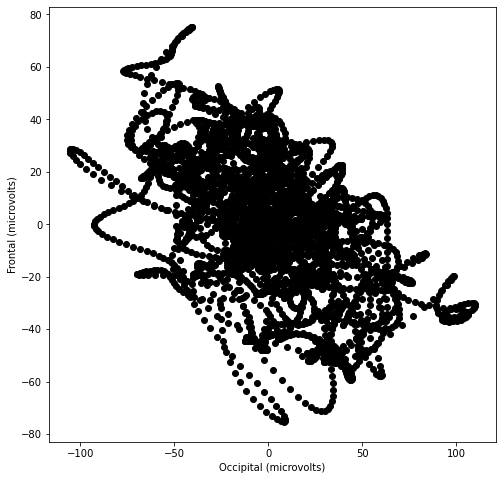

In [44]:
plt.figure(figsize =(8,8))
plt.plot(occ,fro,'ko')
plt.xlabel('Occipital (microvolts)')
plt.ylabel('Frontal (microvolts)')
plt.show()

In [60]:
d,v = linalg.eig(Cdata) #Compute Eigenvalues and Eigenvectors of C
Lambda = np.transpose(v)@Cdata@v #Use eigenvectors to compute Diagonal matrix
xprime = v[:,0]@data #project data onto new variables by a weighted sum
yprime = v[:,1]@data 
xyprime = np.transpose(v)@data #project data onto new variables by matrix multiplication in 1 step.  
Cprime = np.cov(xyprime) #covariance matrix of new variables 
Rprime = np.corrcoef(xyprime) #correlation matrix of new variables 
datarecovered  = v@xyprime #show that this is invertible, I can get back xy from xyprime by matrix multiplication. 

Text(0, 0.5, 'Channel Frontal recovered')

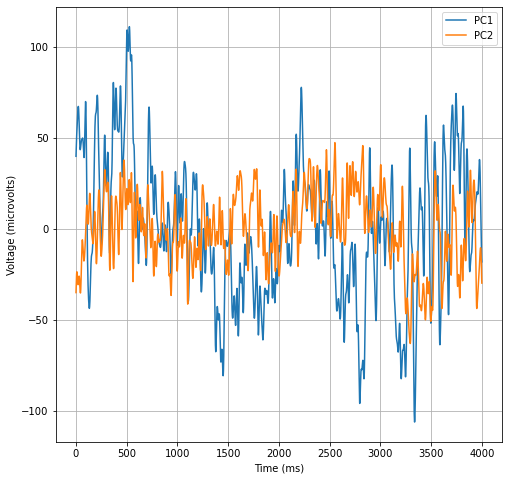

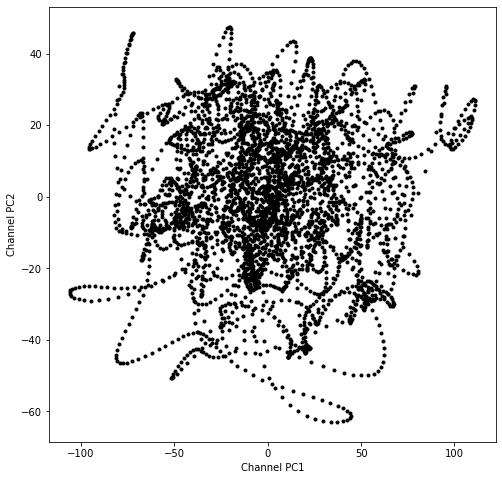

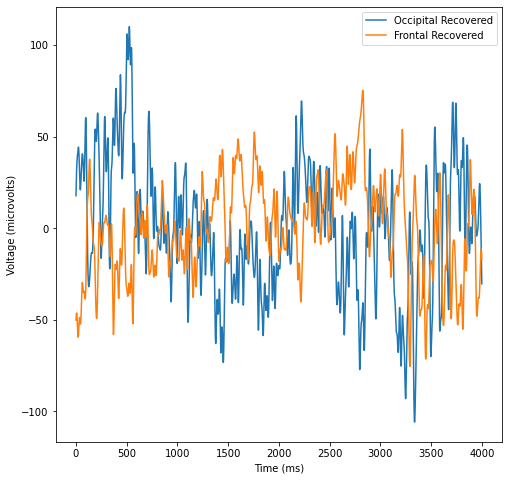

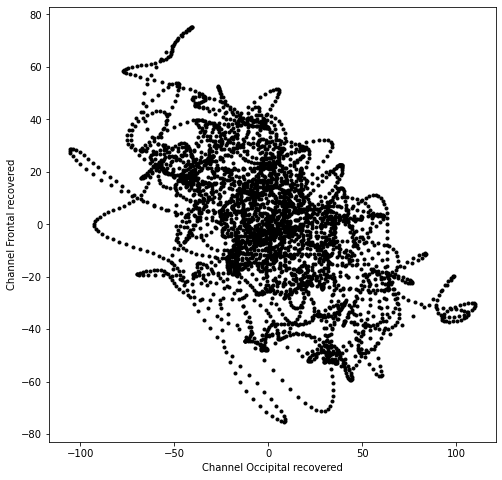

In [64]:

#%% PLOT THE COMPONENT SCORES
plt.figure(figsize = (8,8))
plt.plot(xyprime[0,:],label = 'PC1')
plt.plot(xyprime[1,:],label = 'PC2')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (microvolts)')
plt.grid()
plt.legend()
plt.figure(figsize=(8,8))
plt.plot(xyprime[0,:],xyprime[1,:],'k.')
plt.xlabel('Channel PC1')
plt.ylabel('Channel PC2')
#%%PLOT THE RECOVERED DATA FROM INVERTING THE TRANSFORMATION
plt.figure(figsize=(8,8))
plt.plot(time,datarecovered[0,:],label = 'Occipital Recovered')
plt.plot(time,datarecovered[1,:],label = 'Frontal Recovered')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (microvolts)')
plt.legend()
plt.figure(figsize = (8,8))
plt.plot(datarecovered[0,:],datarecovered[1,:],'k.')
plt.xlabel('Channel Occipital recovered')
plt.ylabel('Channel Frontal recovered')

### Interpreting eigenvalues, eigenvectors, and **principal components** 

In [65]:
print('Eigenvalues')
print(d)
print(d/np.sum(d)) #here I normalized.  
print('Eigenvectors)')
print(v)

Eigenvalues
[1455.55518831  400.96067214]
[0.78402518 0.21597482]
Eigenvectors)
[[ 0.87251721  0.48858338]
 [-0.48858338  0.87251721]]
